In [1]:
import pandas as pa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [2]:
data = pa.read_csv('DataFrame_LastWeek_Project.csv')

print(data)

      branche  day         movies  genres  screen  seats  visitors_adults  \
0    branch 1    1  Hunter Killer  action       1     55               45   
1    branch 1    1  Hunter Killer  action       2     55               33   
2    branch 1    1      Moonlight   drama       1     72               13   
3    branch 1    1      Moonlight   drama       2     72               72   
4    branch 1    1         Dangal   drama       1    150               91   
..        ...  ...            ...     ...     ...    ...              ...   
135  branch 2    7         Dangal   drama       2    150               95   
136  branch 2    7  Pitch Perfect  comedy       1    150               10   
137  branch 2    7  Pitch Perfect  comedy       2    150               45   
138  branch 2    7     La Mission  action       1    250               73   
139  branch 2    7     La Mission  action       2    250               80   

     visitors_children  total_revenue_adults  total_revenue_children  \
0  

In [3]:
sns.set(style="ticks")

## First Insight
### A Monday has the highest revenue in all branches

   day  screen  seats  visitors_adults  visitors_children  \
0    1      30   2708             1214                495   
1    2      30   2708             1261                630   
2    3      30   2708             1222                613   
3    4      30   2708             1282                375   
4    5      30   2708             1045                615   
5    6      30   2708             1309                524   
6    7      30   2708             1417                305   

   total_revenue_adults  total_revenue_children  snacks_revenue  total_revenue  
0                 18210                    4950           26470          49630  
1                 18915                    6300           30250          55465  
2                 18330                    6130           29070          53530  
3                 19230                    3750           26935          49915  
4                 15675                    6150           26985          48810  
5                 19635  

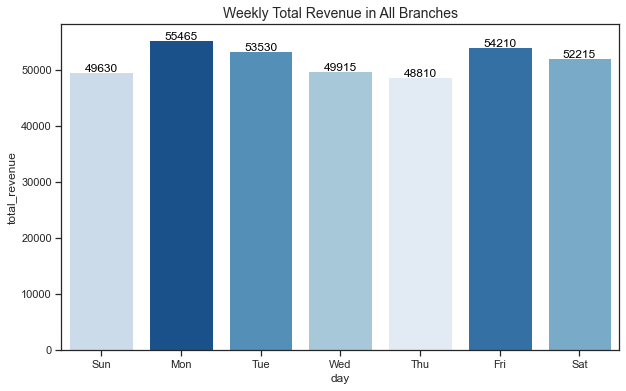

In [4]:
plt.subplots(figsize=(10,6))
branches_revenue=data.groupby('day').sum().reset_index()
print(branches_revenue)

pal = sns.color_palette("Blues_r", len(branches_revenue))
rank = branches_revenue["total_revenue"].argsort().argsort() 
bar_data=sns.barplot(x='day',y='total_revenue',data=branches_revenue, palette=np.array(pal[::-1])[rank])
plt.title("Weekly Total Revenue in All Branches", fontsize=14);
bar_data.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
for index, row in branches_revenue.iterrows():
    bar_data.text(row.name,row.total_revenue, row.total_revenue, color='black', ha="center")

## Second Insight
### In the first branch, we notice the revenue high dramatic through the weekend. On the other hand, in the second branch, the revenue unstable

     branche  day  total_revenue
0   branch 1    1          22735
1   branch 1    2          25515
2   branch 1    3          27840
3   branch 1    4          21715
4   branch 1    5          25695
5   branch 1    6          29230
6   branch 1    7          35120
7   branch 2    1          26895
8   branch 2    2          29950
9   branch 2    3          25690
10  branch 2    4          28200
11  branch 2    5          23115
12  branch 2    6          24980
13  branch 2    7          17095


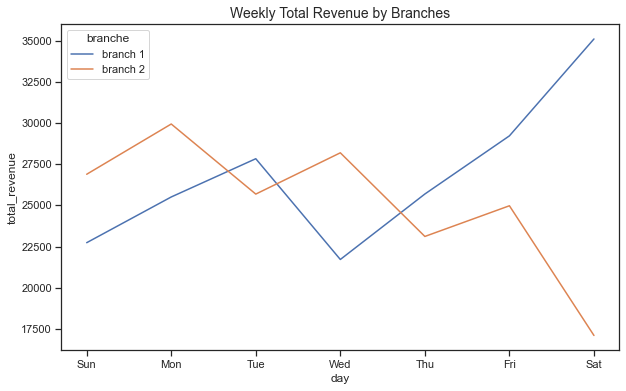

In [5]:
weekly_total_revenue = data.groupby(['branche', 'day'])['total_revenue'].sum().reset_index()
print(weekly_total_revenue)

plt.subplots(figsize=[10,6])
g=sns.lineplot(data=weekly_total_revenue, x="day", y="total_revenue", hue="branche")
g.set_xticks([1,2,3,4,5,6,7])
g.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.title("Weekly Total Revenue by Branches", fontsize=14);

## Third Insight
### The highest revenues came from action movies, then dramas, and after that comedies

genres
action    177135
comedy     58710
drama     127930
Name: total_revenue, dtype: int64


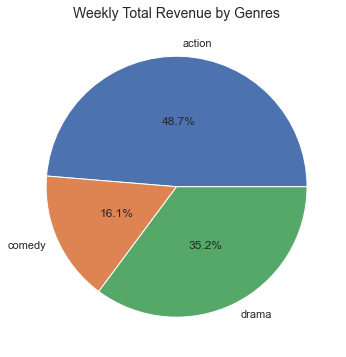

In [6]:
weekly_revenue_genres = data.groupby("genres")["total_revenue"].sum()
print(weekly_revenue_genres)

plt.subplots(figsize=[10,6])
labels = weekly_revenue_genres.keys()
plt.pie(x=weekly_revenue_genres, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Weekly Total Revenue by Genres", fontsize=14);

## Fourth Insight
### The La Mission has the maximum range, the highest median, and value. On the other hand, Moonlight has the lowest median. Also, Hunter Killer has the lowest range of revenue. Overall, the movies have different distribution

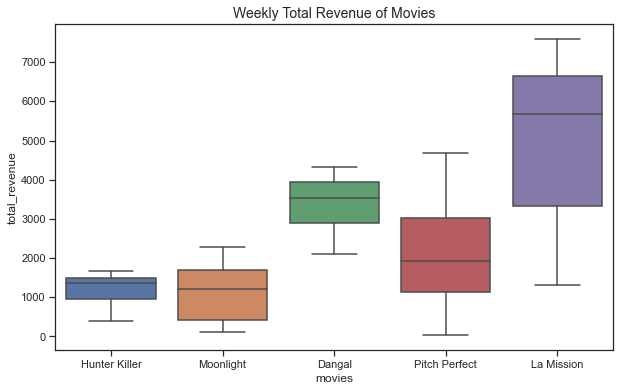

In [7]:
plt.subplots(figsize=[10,6])
sns.boxplot(x="movies", y="total_revenue", data=data)
plt.title("Weekly Total Revenue of Movies", fontsize=14);

## An additional chart to try subplots.

<AxesSubplot:xlabel='movies', ylabel='total_revenue'>

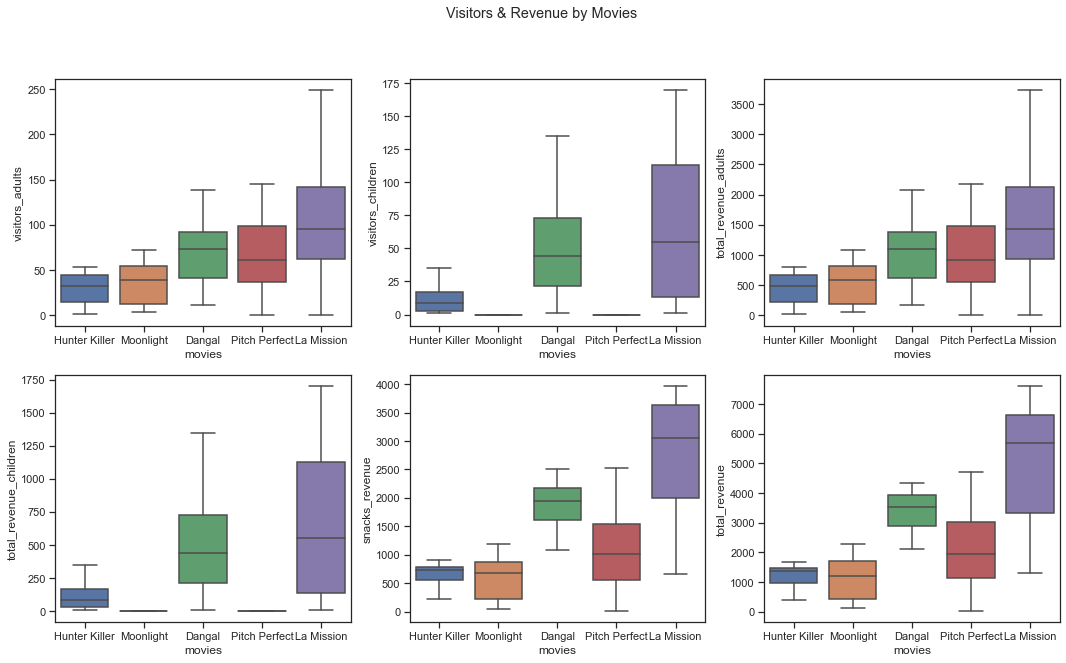

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Visitors & Revenue by Movies')

sns.boxplot(ax=axes[0, 0], data=data, x='movies', y='visitors_adults')
sns.boxplot(ax=axes[0, 1], data=data, x='movies', y='visitors_children')
sns.boxplot(ax=axes[0, 2], data=data, x='movies', y='total_revenue_adults')
sns.boxplot(ax=axes[1, 0], data=data, x='movies', y='total_revenue_children')
sns.boxplot(ax=axes[1, 1], data=data, x='movies', y='snacks_revenue')
sns.boxplot(ax=axes[1, 2], data=data, x='movies', y='total_revenue')